In [1]:
%matplotlib inline

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
from skimage.io import imread
from collections import Counter

<p style="text-align: right; color: saddlebrown; font-size: 13px" > Part $I$

<p style="text-align: center; color: saddlebrown; font-size: 20px" > Analysis of James Joyce's book "Finnegans Wake"

<p style="text-align: center; color: saddlebrown; font-size: 15px" > Concept and execution: Irina Nedyalkova

Now tell me, tell me, tell me then! What was it, Mister Finn?
- A . . . . . . . . . . !
- ? . . . . . . . . . O!

The book "Finnegans Wake" is a brain sport, a fountain of creativity! It has been written in 17 years and has 17 chapters, divided into four parts:
- Part $I$ contains eight chapters;
- Parts II contains four chapters;
- Part III also four chapters;
- Part IV only one short chapter.

To be fluid with the conception of the book, this document comes after part IV. As you will be aware, it is a $360^{\circ}$ story:

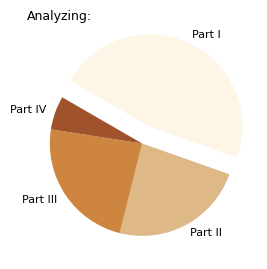

In [5]:
plt.figure(figsize = (3, 3))

values = [8, 4, 4, 1]
colors = ["oldlace", "burlywood", "peru", "sienna"]

explode = (0.2, 0, 0, 0)       # marks the part we want > 0

names = "Part I", "Part II", "Part III", "Part IV"
fontsize = {"fontsize": 8}
plt.pie(values, labels = names, colors = colors, textprops = fontsize,
        explode = explode, counterclock = False, startangle = 150)
plt.title("Analyzing:", size = "9", loc = "left") 

plt.show()

- I copied the words from a .pdf to a .docx file
- I did data cleaning, manually, as I want to have the book read [reed] and experience the story
- Part $I$ includes musical notes, letters "moved contrawatchwise" (E and F) and math delta $\Delta$ 

#### Music cue.

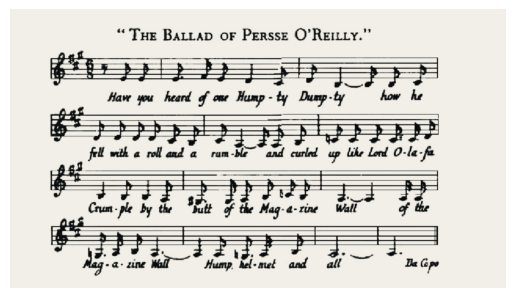

In [6]:
music = imread("fw_ballad_part1.jpg")
plt.axis("off")
plt.imshow(music)
plt.show()

Some more steps needed to display the text in a perfect condition (convert to .txt and encode):

In [7]:
CORPUS_part1 = open("fw_part1_text.txt", encoding = "utf-8-sig").read()            # recognize the 'apostrophes

In [8]:
#CORPUS_part1.strip('\n')           # removes the newline character at the end of the text corpus

Length of Part $I$ of "Finnegans Wake" is 92949 characters:

In [9]:
len(nltk.word_tokenize(CORPUS_part1))

92949

Unique expressions are 25360:

In [10]:
len(Counter(word_tokenize(CORPUS_part1)))

25360

The book is written mostly in unique words and expressions, per centum (%):

In [11]:
len(Counter(word_tokenize(CORPUS_part1))) / len(nltk.word_tokenize(CORPUS_part1))

0.2728377927680771

> Unique expressions in Part $I$ are 27%

There are plentiful names and the expression $O$, for the record, I use lots of $O$'s too.

In [12]:
characters = Counter(word_tokenize(CORPUS_part1))

In [13]:
df_characters = pd.DataFrame.from_dict(characters, orient = "index", columns = ["count"])

In [14]:
df_expressions = df_characters.reset_index()

In [15]:
df_expressions = df_expressions.rename(columns = {"index": "expression"})         # changing column name for more clarity

In [16]:
df_expressions      # show dataframe

,expression,count
0,…riverrun,1
1,",",6635
2,past,14
3,Eve,5
4,and,2787
...,...,...
25355,Telmetale,1
25356,stem,1
25357,Beside,1
25358,rivering,1


We are ready to dive in, I suppose.

I extract all the numbers. We come across a number, 28 times:

In [17]:
df_expressions[df_expressions["expression"].apply(lambda x: x[0].isdigit())].sort_values("count").shape

(28, 2)

In [18]:
df_expressions[df_expressions["expression"].apply(lambda x: x[0].isdigit())].sort_values("count")

,expression,count
17571,3,1
20446,12,1
20232,3/9,1
19646,106,1
19436,28,1
18729,5688,1
18072,10,1
17992,9,1
17974,8,1
17896,7.,1


We have three numbers, mentioned 3 times each:

In [19]:
df_numbers = df_expressions[df_expressions["expression"].apply(lambda x: x[0].isdigit())].sort_values("count")

In [20]:
df_numbers.loc[[1960, 8477, 8479]]

,expression,count
1960,1132,3
8477,32,3
8479,11,3


Can you see a pattern in the mini DataFrame above? The numbers are not random. Let's find the sentences:

In [21]:
sentences = sent_tokenize(CORPUS_part1)             # sentences variable

Conversion number in string to find string in text:

In [22]:
number1132 = str(1132)
sentence1_with_1132 = []

In [23]:
[sentence1_with_1132 for sentence1_with_1132 in sentences if number1132 in sentence1_with_1132]

['1132 A.D. Men like to ants or emmets wondern upon a groot hwide Whallfisk which lay in a Runnel.',
 '1132 A.D. Two sons at an hour were born until a goodman and his hag.',
 'now illegible airy plumeflights, all tiberiously ambiembellishing the initials majuscule of Earwicker: the meant to be baffling chrismon trilithon sign E, finally called after some his hes hecitency Hec, which, moved contrawatchwise, represents his title in sigla as the smaller Δ, fontly called following a certain change of state of grace of nature alp or delta, when single, stands for or tautologically stands beside the consort: (though for that matter, since we have heard from Cathay cyrcles how the hen is not mirely a tick or two after the first fifth fourth of the second eighth twelfth — siangchang hongkong sansheneul — but yirely the other and thirtieth of the ninth from the twentieth, our own vulgar 432 and 1132 irrespectively, why not take the former for a village inn, the latter for an upsidown bridge, a 

Oh, this is a captivating passage! It includes three sentences with the number $1132$. Also in the last one:
- moved contrawatchwise sign E
- "represents his title in sigla as the smaller Δ, fontly called following a certain change of state of grace of nature alp or delta"
- "since we have heard from Cathay cyrcles how the hen is not mirely a tick or two after the first fifth fourth of the second eighth twelfth — siangchang hongkong sansheneul — but yirely the other and thirtieth of the ninth from the twentieth"
- "why not take the former for a village inn, the latter for an upsidown bridge, a multiplication marking for crossroads ahead, which you like pothook for the family gibbet, their old fourwheedler for the bucker’s field, a tea anyway for a tryst someday, and his onesidemissing for an allblind alley leading to an Irish plot in the Champ de Mors, not?"
- the whole sentence is in a playful math sense

In [24]:
number32 = str(32)
sentence2_wi6th_32 = []

In [25]:
[sentence2_with_32 for sentence2_with_32 in sentences if number32 in sentence2_with_32]

['1132 A.D. Men like to ants or emmets wondern upon a groot hwide Whallfisk which lay in a Runnel.',
 '1132 A.D. Two sons at an hour were born until a goodman and his hag.',
 '32, section 11, of the C. L. A. act 1885, anything in this act to the contwawy notwithstanding.',
 'O, by the by, lets wee brag of praties, it ought to be always remembered in connection with what has gone before that there was a northroomer, Herr Betreff ender, out for his zimmer holedigs, digging in number 32 at the Rum and Puncheon (Branch of Dirty Dick’s free house) in Laxlip (where the Sockeye Sammons were stopping at the time orange fasting) prior to that, a Kommerzial (Gorbotipacco, he was wreaking like Zentral Oylrubber) from Osterich, the U.S.E.',
 'Gob and I nose him too well as I do meself, heaving up the Kay Wall by the 32 to 11 with his limelooking horsebags full of sesameseed, the Whiteside Kaffir, and his sayman’s effluvium and his scentpainted voice, puffing out his thundering big brown cabbage!',

The output for number $32$ includes the sentences for number 1132 as well, so I select just the new ones:

In [26]:
[sentence2_with_32 for sentence2_with_32 in sentences if number32 in sentence2_with_32][2]

'32, section 11, of the C. L. A. act 1885, anything in this act to the contwawy notwithstanding.'

In [27]:
[sentence2_with_32 for sentence2_with_32 in sentences if number32 in sentence2_with_32][3]

'O, by the by, lets wee brag of praties, it ought to be always remembered in connection with what has gone before that there was a northroomer, Herr Betreff ender, out for his zimmer holedigs, digging in number 32 at the Rum and Puncheon (Branch of Dirty Dick’s free house) in Laxlip (where the Sockeye Sammons were stopping at the time orange fasting) prior to that, a Kommerzial (Gorbotipacco, he was wreaking like Zentral Oylrubber) from Osterich, the U.S.E.'

In [28]:
[sentence2_with_32 for sentence2_with_32 in sentences if number32 in sentence2_with_32][4]

'Gob and I nose him too well as I do meself, heaving up the Kay Wall by the 32 to 11 with his limelooking horsebags full of sesameseed, the Whiteside Kaffir, and his sayman’s effluvium and his scentpainted voice, puffing out his thundering big brown cabbage!'

We see the numbers $32$ and $11$ in a relationship with each other.

In [29]:
number11 = str(11)
sentence3_with_11 = []

In [30]:
[sentence3_with_11 for sentence3_with_11 in sentences if number11 in sentence3_with_11]

['1132 A.D. Men like to ants or emmets wondern upon a groot hwide Whallfisk which lay in a Runnel.',
 '1132 A.D. Two sons at an hour were born until a goodman and his hag.',
 '32, section 11, of the C. L. A. act 1885, anything in this act to the contwawy notwithstanding.',
 '11/- in the week (Gosh, these wholly romads!)',
 'Gob and I nose him too well as I do meself, heaving up the Kay Wall by the 32 to 11 with his limelooking horsebags full of sesameseed, the Whiteside Kaffir, and his sayman’s effluvium and his scentpainted voice, puffing out his thundering big brown cabbage!',
 'now illegible airy plumeflights, all tiberiously ambiembellishing the initials majuscule of Earwicker: the meant to be baffling chrismon trilithon sign E, finally called after some his hes hecitency Hec, which, moved contrawatchwise, represents his title in sigla as the smaller Δ, fontly called following a certain change of state of grace of nature alp or delta, when single, stands for or tautologically stand

Clearing out the reiteration:

In [31]:
[sentence3_with_11 for sentence3_with_11 in sentences if number11 in sentence3_with_11][3]

'11/- in the week (Gosh, these wholly romads!)'

In [32]:
[sentence3_with_11 for sentence3_with_11 in sentences if number11 in sentence3_with_11][6]

'11.'

In [33]:
[sentence3_with_11 for sentence3_with_11 in sentences if number11 in sentence3_with_11][7]

'Shem’s bodily getup, it seems, included an adze of a skull, an eight of a larkseye, the whoel of a nose, one numb arm up a sleeve, fortytwo hairs off his uncrown, eighteen to his mock lip, a trio of barbels from his megageg chin (sowman’s son), the wrong shoulder higher than the right, all ears, an artificial tongue with a natural curl, not a foot to stand on, a handful of thumbs, a blind stomach, a deaf heart, a loose liver, two fifths of two buttocks, one gleetsteen avoirdupoider for him, a manroot of all evil, a salmonkelt’s thinskin, eelsblood in his cold toes, a bladder tristended, so much so that young Master Shemmy on his very first debouch at the very dawn of protohistory seeing himself such and such, when playing with thistlewords in their garden nursery, Griefotrofio, at Phig Streat 111, Shuvlin, Old Hoeland, (would we go back there now for sounds, pillings and sense?'

The very last sentence is not about 11, it is about the number $111$.

Now, I exclude the numbers from the main DataFrame:

In [34]:
index_numbers = df_expressions[df_expressions["expression"].apply(lambda x: x[0].isdigit())].index

In [35]:
df_expressions.drop(index_numbers)

,expression,count
0,…riverrun,1
1,",",6635
2,past,14
3,Eve,5
4,and,2787
...,...,...
25355,Telmetale,1
25356,stem,1
25357,Beside,1
25358,rivering,1


Now I am looking for punctuations and other signs, to exclude them also:

In [36]:
df_expressions.drop(index_numbers).sort_values("expression").head(15)

,expression,count
119,!,1264
14453,&,5
117,(,624
120,),633
1,",",6635
7094,-,6
15685,-Muggli,1
21976,-in-laws,1
6527,-war,2
26,.,2050


Excluding through index positions:

In [37]:
df_words_and_letters = df_expressions.drop(index_numbers).sort_values("expression").drop([119, 14453, 117, 120,
                       1, 7094, 26, 53, 1461, 257, 15800, 15802, 5792, 6, 2357, 22663, 15266, 15798, 15803, 6432])

In [38]:
df_words_and_letters        # show

,expression,count
15685,-Muggli,1
21976,-in-laws,1
6527,-war,2
848,A,70
8481,A.,2
...,...,...
15806,é,1
21504,édition,1
15813,ùpon,1
7301,œdor,1


Looking for words with the initial $I$:

In [39]:
index_initial_I = df_words_and_letters.expression.str.extractall(r"(^I)+").groupby(level = 0).agg(" ".join).index

In [40]:
index_initial_I

Int64Index([  258,   543,   664,   952,   977,  1131,  1775,  1799,  1813,
             1843,
            ...
            24401, 24626, 24711, 24893, 24983, 24998, 25015, 25188, 25247,
            25272],
           dtype='int64', length=113)

Show all words, beginning with an $I$:

In [41]:
pd.set_option("display.max_rows", 113)
df_words_and_letters.loc[index_initial_I]

,expression,count
258,Iseut,1
543,It,69
664,I,468
952,Isout,1
977,Ill,3
1131,Injun,1
1775,Ivor,2
1799,Irish,21
1813,Is,12
1843,Incabus,1


Let's look in the sentences, including the words:
- Iris, Iro-European, Intelligence, Izaak, Interior, Isha, Irene, Incredible and Isabel.

In [42]:
word_iris = str("Iris")
sentence_iris = []

In [43]:
[sentence_iris for sentence_iris in sentences if word_iris in word_iris in sentence_iris]

['Behove this sound of Irish sense.',
 'Now (to forebare for ever solittle of Iris Trees and Lili O’Rangans), concerning the genesis of Harold or Humphrey Chimpden’s occupational agnomen (we are back in the presurnames prodromarith period, of course just when enos chalked halltraps) and discarding once for all those theories from older sources which would link him back with such pivotal ancestors as the Glues, the Gravys, the Northeasts, the Ankers and the Earwickers of Sidlesham in the Hundred of Manhood or proclaim him off sprout of vikings who had founded wapentake and seddled hem in Herrick or Eric, the best authenticated version, the Dumlat, read the Reading of Hofed-ben-Edar, has it that it was this way.',
 'Gaping Gill, swift to mate errthors, stern to checkself, (diagnosing through eustacetube that it was to make with a markedly postpuberal hypertituitary type of Heidelberg mannleich cavern ethics) lufted his slopingforward, bad Sweatagore good murrough and dublnotch on to it a

In [44]:
df_expressions.iloc[4316]

expression    Iris
count            1
Name: 4316, dtype: object

We have just a single time, mentioned the word Iris, so I display just that one sentence:

In [45]:
[sentence_iris for sentence_iris in sentences if word_iris in word_iris in sentence_iris][1]

'Now (to forebare for ever solittle of Iris Trees and Lili O’Rangans), concerning the genesis of Harold or Humphrey Chimpden’s occupational agnomen (we are back in the presurnames prodromarith period, of course just when enos chalked halltraps) and discarding once for all those theories from older sources which would link him back with such pivotal ancestors as the Glues, the Gravys, the Northeasts, the Ankers and the Earwickers of Sidlesham in the Hundred of Manhood or proclaim him off sprout of vikings who had founded wapentake and seddled hem in Herrick or Eric, the best authenticated version, the Dumlat, read the Reading of Hofed-ben-Edar, has it that it was this way.'

In [46]:
word_iro = "Iro-European"
sentence_iro = []

In [47]:
[sentence_iro for sentence_iro in sentences if word_iro in word_iro in sentence_iro]

['Gaping Gill, swift to mate errthors, stern to checkself, (diagnosing through eustacetube that it was to make with a markedly postpuberal hypertituitary type of Heidelberg mannleich cavern ethics) lufted his slopingforward, bad Sweatagore good murrough and dublnotch on to it as he was greedly obliged, and like a sensible ham, with infinite tact in the delicate situation seen the touchy nature of its perilous theme, thanked um for guilders received and time of day (not a little token abock all the same that that was owl the God’s clock it was) and, upon humble duty to greet his Tyskminister and he shall gildthegap Gaper and thee his a mouldy voids, went about his business, whoever it was, saluting corpses, as a metter of corse (one could hound him out had one hart to for the monticules of scalp and dandruff droppings blaze his trail) accompanied by his trusty snorler and his permanent reflection, verbigracious; I have met with you, bird, too late, or if not, too worm and early: and wit

Long sentences there are, ha? That one is truly I like too! Here on quotes:
- "Gaping Gill, swift to mate errthors, stern to checkself, (diagnosing through eustacetube that it was to make with a markedly postpuberal hypertituitary type of Heidelberg mannleich cavern ethics)"
- "and like a sensible ham, with infinite tact in the delicate situation seen the touchy nature of its perilous theme, thanked um for guilders received and time of day (not a little token abock all the same that that was owl the God’s clock it was)"
- "upon humble duty to greet his Tyskminister and he shall gildthegap Gaper and thee his a mouldy voids, went about his business, whoever it was"
- "I have met with you, bird, too late, or if not, too worm and early"
- "and with tag for ildiot repeated in his secondmouth language as many of the bigtimer’s verbaten words which he could balbly call to memory that same kveldeve, ere the hour of the twattering of bards in the twitterlitter between Druidia and the Deepsleep Sea, when suppertide and souvenir to Charlatan Mall jointly kem gently and along the quiet darkenings of Grand and Royal"
- "if you please, (Irish saliva, mawshe dho hole, but would a respectable prominently connected fellow of Iro-European ascendances with welldressed ideas who knew the correct thing such as Mr Shallwesigh or Mr Shallwelaugh expectorate after such a callous fashion, no thank yous!"

> No, thank yous! :)

>> "Behove this sound of Irish sense." is also quite amazing!

In [48]:
word_intelligence = "Intelligence"
sent_intelligence = []

In [49]:
[sent_intelligence for sent_intelligence in sentences if word_intelligence in word_intelligence in sent_intelligence]

['Poor old dear Paul Horan, to satisfy his literary as well as his criminal aspirations, at the suggestion thrown out by the doomster in loquacity lunacy, so says the Dublin Intelligence, was thrown into a Ridley’s for inmates in the northern counties.']

>>> Dublin Intelligence vs. Artificial Intelligence

$Editor's$ $Note$: Dublin Intelligence was a newspaper, published in Dublin between the years of 1690 and 1732.

In [50]:
word_izaak = "Izaak"
sent_izaak = []

In [51]:
[sent_izaak for sent_izaak in sentences if word_izaak in word_izaak in sent_izaak]

['It was in a fairly fishy kettlekerry, after the Fianna’s foreman had taken his handful, enriched with ancient woods and dear dutchy deeplinns mid which were an old knoll and a troutbeck, vainyvain of her osiery and a chatty sally with any Wilt or Walt who would ongle her as Izaak did to the tickle of his rod and watch her waters of her sillying waters of and there now brown peater arripple (may their quilt gild lightly over his somnolulutent form!)']

In [52]:
word_int = "Interior"
sent_int = []

In [53]:
[sent_int for sent_int in sentences if word_int in word_int in sent_int]

['For Ark see Zoo, Cleopater’s Nedlework Ficturing Aldborougham on the Sahara with the Coombing of the Cammmels and the Parlourmaids of Aegypt, Cock in the Pot for Father, Placeat Vestrae, A New Cure for an Old Clap, Where Portentos they’d Grow Gonder how I’d Wish I Woose a Geese; Gettle Nettie, Thrust him not, When the Myrtles of Venice Played to Bloccus’s Line, To Plenge Me High He Waives Chiltern on Friends, Oremunds Queue Visits Amen Mart, E’en Tho’ I Granny a-be He would Fain Me Cuddle, Twenty of Chambers, Weighty Ten Beds and a Wan Ceteroom, I Led the Life, Through the Boxer Coxer Rising in the House with the Golden Stairs, The Following Fork, He’s my O’Jerusalem and I’m his Po, The Best in the West, By the Stream of Zemzem under Zigzag Hill, The Man That Made His Mother in the Marlborry Train, Try Our Taal on a Taub, The Log of Anny to the Base All, Nopper Tipped a Nappiwenk to his Notylytl Dantsigirls, Prszss Orel Orel the King of Orlbrdsz, Intimier Minnelisp of an Extorreor Mo

Hell of a sentence! It is written in capitalized words, names and nouns.

Appropriate quoting:
1. "For Ark see Zoo, Cleopater’s Nedlework Ficturing Aldborougham on the Sahara with the Coombing of the Cammmels and the Parlourmaids of Aegypt, Cock in the Pot for Father, Placeat Vestrae, A New Cure for an Old Clap, Where Portentos they’d Grow Gonder how I’d Wish I Woose a Geese";
2. "Twenty of Chambers, Weighty Ten Beds and a Wan Ceteroom, I Led the Life, Through the Boxer Coxer Rising in the House with the Golden Stairs";
3. "I have not Stopped Water Where It Should Flow";
4. "Thee Steps Forward, Two Stops Back, My Skin Appeals to Three Senses and My Curly Lips Demand Columbkisses".

In [54]:
word_isha = "Isha"
sent_isha = []

In [55]:
[sent_isha for sent_isha in sentences if word_isha in word_isha in sent_isha]

['Isha, why wouldn’t we be happy, avourneen, on the mills’ money he’ll soon be leaving you as soon as I’ve my own owned brooklined Georgian mansion’s lawn to recruit upon by Doctor Cheek’s special orders and my copper’s panful of soybeans and Irish in my east hand and a James’s Gate in my west, after all the errears and erroriboose of combarative embottled history, and your goodself churning over the newleaved butter (more power to you), the choicest and the cheapest from Atlanta to Oconee, while I’ll be drowsing in the gaarden.',
 'Ishallassoboundbewilsothoutoosezit.']

In [56]:
word_ir = "Irene"
sent_ir = []

In [57]:
[sent_ir for sent_ir in sentences if word_ir in word_ir in sent_ir]

['Only for that these will not breathe upon Norronesen or Irenean the secrest of their soorcelossness.',
 'Let Pauline be Irene.']

In [58]:
word_incr = "Incredible"
sent_incr = []

In [59]:
[sent_incr for sent_incr in sentences if word_incr in word_incr in sent_incr]

['Incredible!']

In [60]:
word_isa = "Isabel"
sent_isa = []

In [61]:
[sent_isa for sent_isa in sentences if word_isa in word_isa in sent_isa]

['A tinker’s bann and a barrow to boil his billy for Gipsy Lee; a cartridge of cockaleekie soup for Chummy the Guardsman; for sulky Pender’s acid nephew deltoïd drops, curiously strong; a cough and a rattle and wildrose cheeks for poor Piccolina Petite MacFarlane; a jigsaw puzzle of needles and pins and blankets and shins between them for Isabel, Jezebel and Llewelyn Mmarriage; a brazen nose and pigiron mittens for Johnny Walker Beg; a papar flag of the saints and stripes for Kevineen O’Dea; a puffpuff for Pudge Craig and a nightmarching hare for Techertim Tombigby; waterleg and gumboots each for Bully Hayes and Hurricane Hartigan; a prodigal heart and fatted calves for Buck Jones, the pride of Clonliffe; a loaf of bread and a father’s early aim for Val from Skibereen; a jauntingcar for Larry Doolin, the Ballyclee jackeen; a seasick trip on a government ship for Teague O’Flanagan; a louse and trap for Jerry Coyle; slushmincepies for Andy Mackenzie; a hairclip and clackdish for Penceles

<p style = "font-size: 14px; text-align: left; color: gray" > work in progress... will continue asap

"A way a lone a last a loved a long the riverrun, past Eve and Adam’s, from swerve of shore to bend of bay, brings us by a commodius vicus of recirculation back to Howth Castle and Environs." We always go back to where it all began.

References:
1. Let me know if you have any questions: irina.nedyalkova@hotmail.com